# 1. Importing libraries and data

In [78]:
# Importing libraries

# Data Wrangling and Viz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [ ]:
# Creating a Pipeline fot import Data
def importdata(filename):
    path = "C:\\Users\\Usuario\\Documents\\Ciência de Dados\\Datasets\\"
    return pd.read_csv(path + filename)

In [110]:
# Importing data
df = importdata('yield_df.csv')

# 2. Checking data and EDA

## 2.1. Checking data

In [111]:
# Checking Dataset Format and columns
print(30*'-', 'Shape', 30*'-')
print(df.shape)
print(30*'-', 'Columns', 30*'-')
print(df.columns)
print(30*'-', 'Short description', 30*'-')
print(df.describe())

------------------------------ Shape ------------------------------
(28242, 8)
------------------------------ Columns ------------------------------
Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')
------------------------------ Short description ------------------------------
         Unnamed: 0          Year    hg/ha_yield  \
count  28242.000000  28242.000000   28242.000000   
mean   14120.500000   2001.544296   77053.332094   
std     8152.907488      7.051905   84956.612897   
min        0.000000   1990.000000      50.000000   
25%     7060.250000   1995.000000   19919.250000   
50%    14120.500000   2001.000000   38295.000000   
75%    21180.750000   2008.000000  104676.750000   
max    28241.000000   2013.000000  501412.000000   

       average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp  
count                    28242.00000       28242.000000  28242.000000  
me

In [114]:
df.columns = ['Index', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Index                          28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [116]:
df = df.set_index('Index')

In [117]:
# Visualizing df
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Index,,,,,,,
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [106]:
# Checking nulls
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [118]:
# Checking duplicates
df.duplicated().sum()

np.int64(2310)

In [107]:
# Removing duplicates
df.drop_duplicates(inplace=True)
df.shape

(25932, 7)

In [108]:
# Converting col 'Year' to datetime
df['Year'] = pd.to_datetime(df.Year, format='%Y')

In [109]:
# Checking how many differente attributes has on 'Item' and 'Area'
item = df['Item'].nunique()
area = df['Area'].nunique()

print(f'Item: {item}, Area: {area}')

Item: 10, Area: 101


- Original shape: (28242, 8)
- Original columns: ['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
    - Need to set 'Unnamed: 0' as index
- The dataframe has 2310 duplicated data, so I've used dorp_duplicates() to remove them
- I've transformed column 'Year' to datetime to distinguish from numerical columns
- The columns 'Item' and 'Area' have respectively 10 and 101 unique values, this will be useful when I will need to use Label or One Hot Encoding.

## 2.2. EDA

In [35]:
# Describing data
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


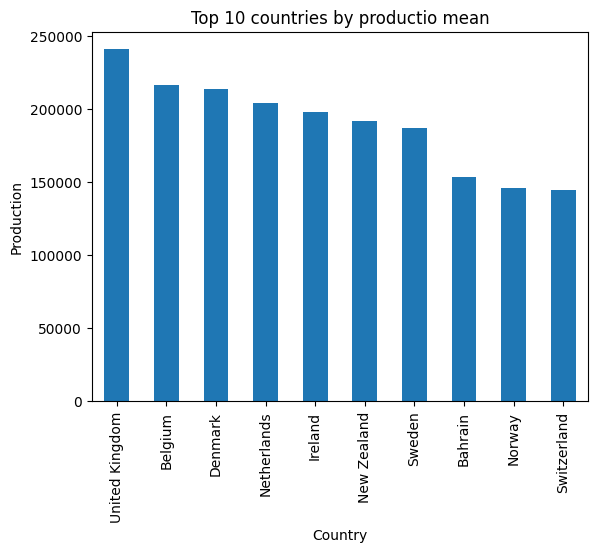

In [56]:
# Checking Top 10 countries by production mean
countries = df.groupby('Area')['hg/ha_yield'].mean()
countries = countries.sort_values(ascending=False)
top10_countries = countries.head(10)
top10_countries.plot(kind='bar')
plt.title('Top 10 countries by productio mean')
plt.xlabel('Country')
plt.ylabel('Production')
plt.show()

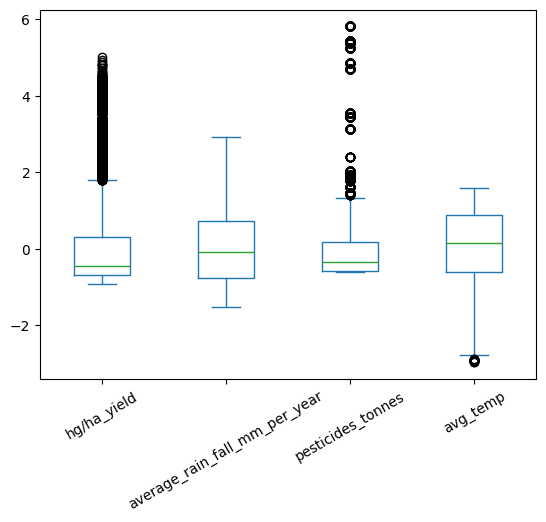

In [99]:
# Searching for outliers
df_numerical = df.drop(columns=['Area', 'Item','Year'])
df_numerical.apply(scale).plot.box() 
plt.xticks(rotation=30)
plt.show()

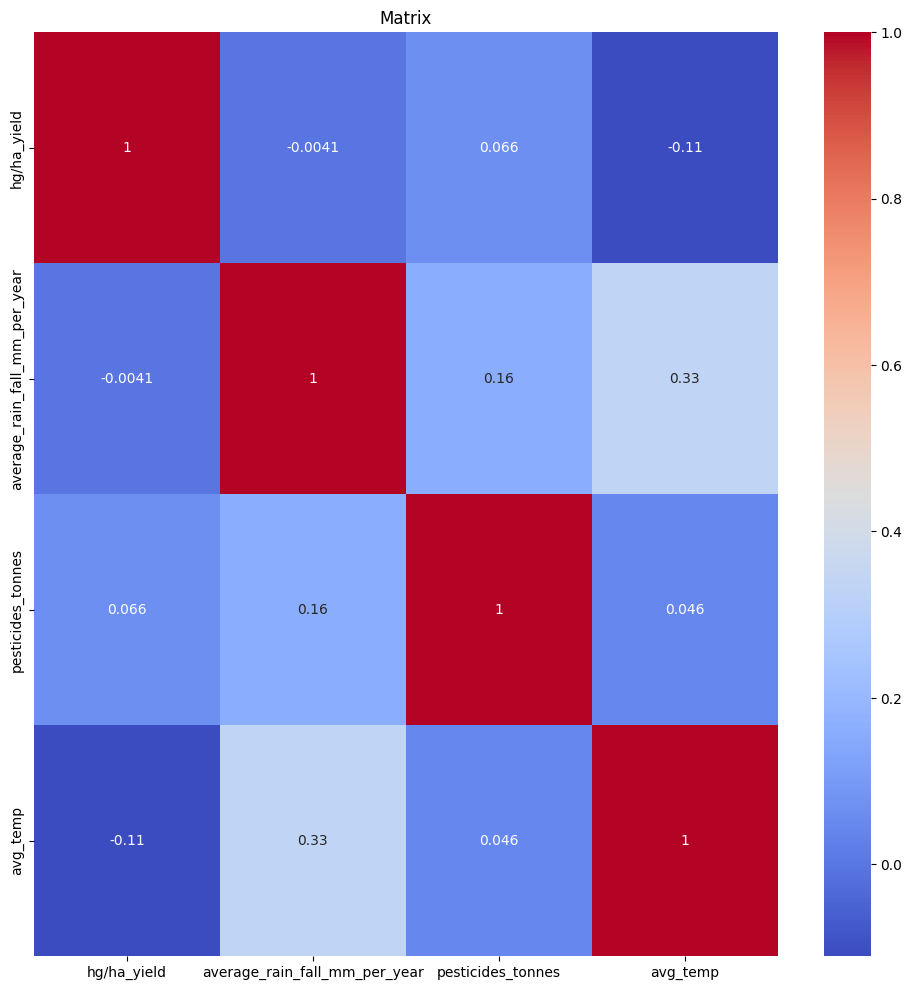

In [ ]:
# Creating a heatmap to see the correlation
corr_matrix = df.drop(columns=['Area', 'Item','Year']).corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrix')
plt.show()